In [1]:
import os
import sys

sys.path.append(os.path.realpath('..'))

import google.auth


import pandas as pd
pd.options.display.max_colwidth = 100

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter

def keth(x, pos):
    'The two args are the value and tick position'
    return '%1.fK' % (x * 1e-3)
keth_formatter = FuncFormatter(keth)

import pandas_gbq
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file('/Users/ankitchiplunkar/.config/gcloud/.gcloud.json')
pandas_gbq.context.project = 'frontier0x'
pandas_gbq.context.credentials = credentials

### Calculate effective gas price

In [2]:
pd.read_gbq("""
select * from frontier0x.research.cefidefi_q12023 limit 10
""")




,transaction_hash,token_address_1,token_value_1,token_address_2,token_value_2,num_tokens,num_transfers,block_timestamp,hash,from_address,...,base_fee_per_gas,receipt_gas_used,receipt_effective_gas_price,max_priority_fee_per_gas,proposer_payment,effective_gas_price,gas_price_multiple,transactionHash,payment_type,arb_type
0,0x1ba41bb53d1677e246f008a07375e26e430a9d3e9e06e35addda86a726507cb3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2421979145076838769,0x4e15361fd6b4bb609fa63c81a2be19d873717870,8799075958234686535119,2,2,2023-03-02 07:26:59+00:00,0x1ba41bb53d1677e246f008a07375e26e430a9d3e9e06e35addda86a726507cb3,0x1ea6588340b8945c7927f0a70a02d86c699cba41,...,17698229852,106631,56769951036,39071721184,0E-9,56769951036.000000000,3.207662660,None,direct,cefi-defi
1,0x2a58d21303c651b21c7f7056ed2c32f09db62bfc730cf875a2a88741bd3570cb,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4060678440859533577,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,5857104807,2,2,2023-03-11 00:12:23+00:00,0x2a58d21303c651b21c7f7056ed2c32f09db62bfc730cf875a2a88741bd3570cb,0xe9f82f15910e161999777036e20cb4108f4df800,...,51343996720,108652,52063996720,720000000,0E-9,52063996720.000000000,1.014023061,None,direct,cefi-defi
2,0x42fd6bf3291c7a87a87d2e46ef71865ea233bc7a32a677f45d534046aa6081b2,0x3432b6a60d23ca0dfca7761b7ab56459d9c964d0,691071127870570940230,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4970112236298206788,2,2,2023-01-28 04:15:23+00:00,0x42fd6bf3291c7a87a87d2e46ef71865ea233bc7a32a677f45d534046aa6081b2,0x5aa3a868adfa844c07293785621a6fad2f59c08f,...,12134421738,207040,12134421738,0,2554094763582405.000000000,24470659970.140673300,2.016631736,None,indirect,cefi-defi
3,0x432c350ce603a3a92e46ec3292e6ae7bd64ad73aec57009b34273f2b4ab1505c,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,714840426847050714441,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,5230063521,2,2,2023-02-20 07:52:59+00:00,0x432c350ce603a3a92e46ec3292e6ae7bd64ad73aec57009b34273f2b4ab1505c,0x00a2aebc7e233cd2ffe5ab5856f90f0ad2fa3ccd,...,19293868024,154334,19293868024,0,90880733912953.000000000,19882725527.291257921,1.030520448,None,indirect,cefi-defi
4,0x560b1dd3e89303b4ddf38bf074fd58133c4226af034f9d9666bd65545f466f0a,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,12816113425465115279595,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,10697341874999998464,2,2,2023-02-22 12:29:35+00:00,0x560b1dd3e89303b4ddf38bf074fd58133c4226af034f9d9666bd65545f466f0a,0xe06c265b53ee569225d9aebe15ce3eeffd8519ba,...,23544565761,144580,25544565761,2000000000,421304465056717.000000000,28458554314.442502421,1.208710095,None,indirect,cefi-defi
5,0xbf905e9459a45959ce34d9cb82578effc7231dc2f8945e9f76c8c18941555dfb,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,74892905649269024472,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,113996132477,2,2,2023-01-14 09:59:11+00:00,0xbf905e9459a45959ce34d9cb82578effc7231dc2f8945e9f76c8c18941555dfb,0x0039b625b1d8632c7a0057c964ec58a9f39789d3,...,19923233942,130374,19923233942,0,15774176655285046.000000000,140914970448.397333824,7.072896441,None,indirect,cefi-defi
6,0xc0379f6a328e840c371351f872ef092af82093bfc08e39961f7a2a927797be95,0x8c15ef5b4b21951d50e53e4fbda8298ffad25057,27972763589598002602638,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,5312449893680683773,2,2,2023-02-22 05:47:35+00:00,0xc0379f6a328e840c371351f872ef092af82093bfc08e39961f7a2a927797be95,0xe2e54270813c5c44a6f97d123120952a12b00000,...,25222308299,126372,30222308299,5000000000,0E-9,30222308299.000000000,1.198237209,None,direct,cefi-defi
7,0xd4a5b99203e26863195286fb806d2530cd1a679ae4a138688a9f824fdf4292c8,0x7d1afa7b718fb893db30a3abc0cfc608aacfebb0,23580573000000000229376,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,20755530632918303716,2,2,2023-02-18 19:50:35+00:00,0xd4a5b99203e26863195286fb806d2530cd1a679ae4a138688a9f824fdf4292c8,0xcc0409a4766617cc9edcf586c0b8fe1e0e56d4bf,...,19609525031,127981,19609525031,0,2564560000000000.000000000,39648124510.610254647,2.021880920,None,indirect,cefi-defi
8,0xe2dab050696be62b8c3b959c4664e491fdfac899e6e88933e790b9e997

## Distribution of WETH USDC plot

In [31]:
base_token = 'WETH'
df = pd.read_gbq(f"""
SELECT 
CASE 
    WHEN token_symbol_1 in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') THEN token_value_1
    WHEN token_symbol_2 in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') THEN token_value_2
ELSE 0 END as stables, 
CASE 
    WHEN token_symbol_1 not in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') THEN token_symbol_1
    WHEN token_symbol_2 not in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') THEN token_symbol_2
ELSE '' END as other_token
FROM
(SELECT transaction_hash, tm1.symbol as token_symbol_1, CAST(token_value_1 as numeric)/pow(10, tm1.decimals) as token_value_1, tm2.symbol as token_symbol_2, CAST(token_value_2 as numeric)/pow(10, tm2.decimals) as token_value_2
, block_timestamp, block_number
, base_fee_per_gas, receipt_gas_used, receipt_effective_gas_price, max_priority_fee_per_gas, proposer_payment, effective_gas_price, gas_price_multiple
, token_address_1, tm1.name as token_name_1, tm1.decimals as token_decimals_1
, token_address_2, tm2.name as token_name_2, tm2.decimals as token_decimals_2
 FROM `frontier0x.research.cefidefi_q12023` as cd
inner join `frontier0x.research.tokens_metadata` as tm1
on lower(cd.token_address_1) = lower(tm1.token_address)
inner join `frontier0x.research.tokens_metadata` as tm2
on lower(cd.token_address_2) = lower(tm2.token_address)
WHERE (tm1.symbol in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') and tm2.symbol = '{base_token}')
or (tm2.symbol in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') and tm1.symbol = '{base_token}')
)
""")

(143921,)
(143918,)


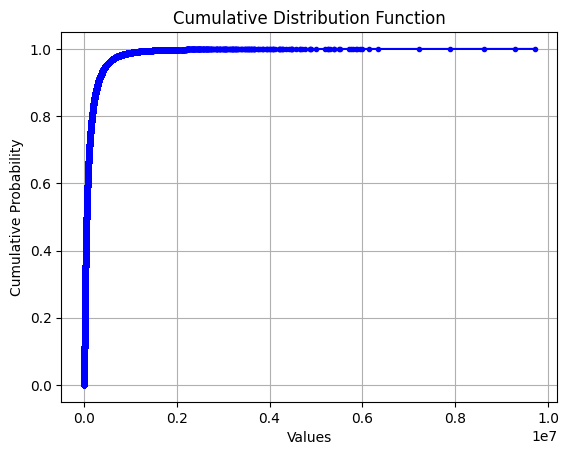

In [40]:
# Step 1: Select the column
selected_column = df['stables']

# Step 2: Sort the values in ascending order
sorted_values = selected_column.sort_values()
print(sorted_values.shape)
sorted_values = sorted_values[sorted_values < 10e6]
print(sorted_values.shape)
cumulative_prob = sorted_values.rank(method='average') / len(sorted_values)

# Step 4: Plot the CDF
plt.plot(sorted_values, cumulative_prob, marker='.', linestyle='-', color='blue')
plt.xlabel('Values')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function')
plt.grid(True)
plt.show()

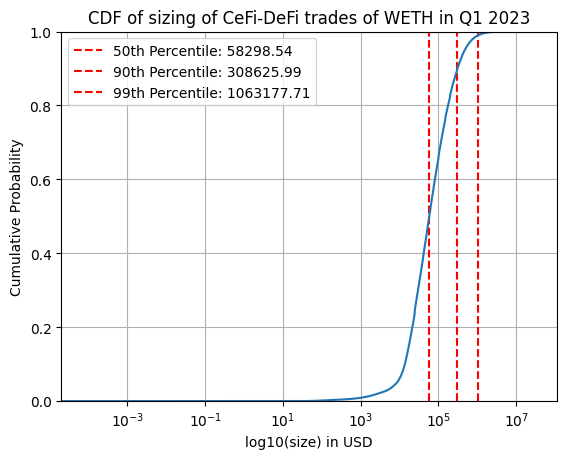

In [51]:
to_plot = df
pct_values = [50, 90, 99]
percentiles = np.percentile(to_plot['stables'], pct_values)

for i, percentile in enumerate(percentiles):
    plt.axvline(x=percentile, color='red', linestyle='--', label=f'{pct_values[i]}th Percentile: {percentile:.2f}')

plt.xscale('log')

sns.ecdfplot(data=to_plot, x='stables')
plt.xlabel(f'log10(size) in USD')
plt.ylabel('Cumulative Probability')
plt.title(f'CDF of sizing of CeFi-DeFi trades of {base_token} in Q1 2023')
plt.grid(True)
plt.legend()
plt.show()

Text(0, 0.5, 'Count')

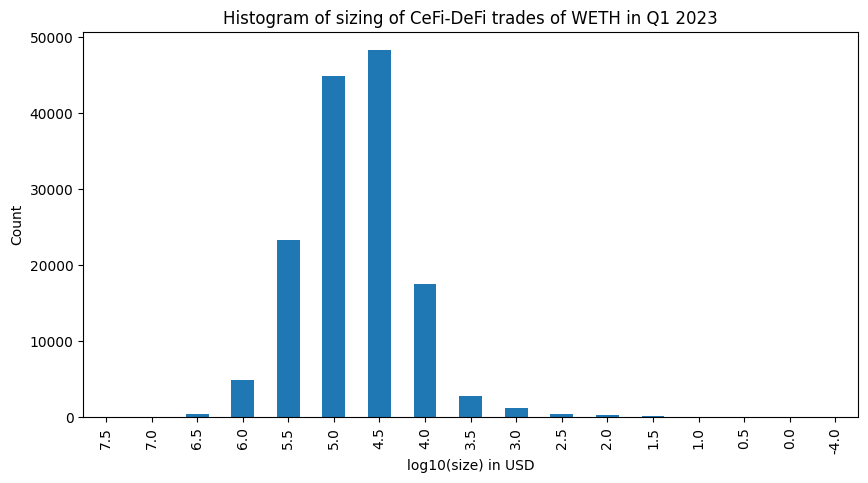

In [27]:
df.sort_values('bin', ascending=False, inplace=True)
ax = df.plot(x='bin', y='count', kind='bar', figsize=(10, 5), title=f'Histogram of sizing of CeFi-DeFi trades of {base_token} in Q1 2023', legend=False)
ax.set_xlabel(f'log10(size) in USD')
ax.set_ylabel(f'Count')

### CDF per block costs

97% of all the trades can be priced

In [60]:
base_token = 'WETH'
pd.read_gbq("""
SELECT sum(priced_token)*100/count(1) as pct_priced
FROM (
SELECT
CASE 
    WHEN (token_symbol_1 = 'WETH' or token_symbol_2 = 'WETH' or token_symbol_1 in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') or token_symbol_2 in ('USDT', 'USDC', 'DAI', 'TUSD', 'BUSD', 'PAX', 'GUSD') ) THEN 1
ELSE 0 END as priced_token, block_number
FROM
(SELECT transaction_hash, tm1.symbol as token_symbol_1, CAST(token_value_1 as numeric)/pow(10, tm1.decimals) as token_value_1, tm2.symbol as token_symbol_2, CAST(token_value_2 as numeric)/pow(10, tm2.decimals) as token_value_2
, block_timestamp, block_number
, base_fee_per_gas, receipt_gas_used, receipt_effective_gas_price, max_priority_fee_per_gas, proposer_payment, effective_gas_price, gas_price_multiple
, token_address_1, tm1.name as token_name_1, tm1.decimals as token_decimals_1
, token_address_2, tm2.name as token_name_2, tm2.decimals as token_decimals_2
 FROM `frontier0x.research.cefidefi_q12023` as cd
inner join `frontier0x.research.tokens_metadata` as tm1
on lower(cd.token_address_1) = lower(tm1.token_address)
inner join `frontier0x.research.tokens_metadata` as tm2
on lower(cd.token_address_2) = lower(tm2.token_address)
))
""")

,pct_priced
0,97.53554
